In [ ]:
cd '/mmfs1/data/aglinska/BC-MRI-AE/'

In [2]:
import pickle 
import numpy as np
from helper_funcs import *

In [3]:
embed = pickle.load(open('./Data/embedded_data_noreducer.pickle','rb'))

In [4]:
embed['sfari_embedding_vae'].shape

(51, 32)

In [5]:
embed.keys()

dict_keys(['embedding_bg', 'embedding_sl', 'embedding_vae', 'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl', 'bg_space_abide', 'sl_space_abide', 'vae_space_abide', 'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari', 'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari'])

In [6]:
embed['embedding_bg'].shape

(470, 16)

Text(0, 0.5, 'Latent Dim 2 (UMAP, A.U.)')

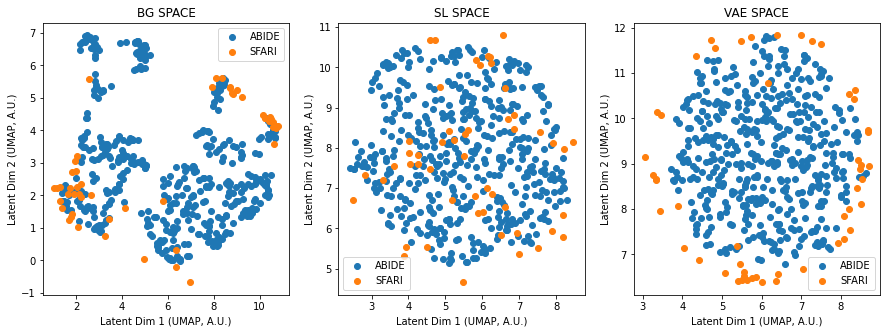

In [7]:
plt.figure(figsize=(15,5))
embedded_data = embed
plt.subplot(1,3,1)
plt.scatter(embedded_data['bg_space_abide'][:,0],embedded_data['bg_space_abide'][:,1])
plt.scatter(embedded_data['bg_space_sfari'][:,0],embedded_data['bg_space_sfari'][:,1])
#plt.scatter(bg_space_sfari[:,0],bg_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('BG SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

plt.subplot(1,3,2)
plt.scatter(embedded_data['sl_space_abide'][:,0],embedded_data['sl_space_abide'][:,1])
plt.scatter(embedded_data['sl_space_sfari'][:,0],embedded_data['sl_space_sfari'][:,1])
#plt.scatter(sl_space_sfari[:,0],sl_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('SL SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

plt.subplot(1,3,3)
plt.scatter(embedded_data['vae_space_abide'][:,0],embedded_data['vae_space_abide'][:,1])
plt.scatter(embedded_data['vae_space_sfari'][:,0],embedded_data['vae_space_sfari'][:,1])
#plt.scatter(vae_space_sfari[:,0],vae_space_sfari[:,1])
plt.legend(['ABIDE','SFARI']);
plt.title('VAE SPACE')
plt.xlabel('Latent Dim 1 (UMAP, A.U.)')
plt.ylabel('Latent Dim 2 (UMAP, A.U.)')

#plt.savefig('/mmfs1/data/aglinska/figures/spaces_abide_sfari.png',dpi=300)

In [8]:
embed.keys()

dict_keys(['embedding_bg', 'embedding_sl', 'embedding_vae', 'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl', 'bg_space_abide', 'sl_space_abide', 'vae_space_abide', 'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari', 'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari'])

In [9]:
bg_space_abide = embed['bg_space_abide']
sl_space_abide = embed['sl_space_abide']
vae_space_abide = embed['vae_space_abide']

sl_space_sfari = embed['sl_space_sfari']
bg_space_sfari = embed['bg_space_sfari']
vae_space_sfari = embed['vae_space_sfari']

In [10]:
bg_space_sfari.shape

(51, 2)

In [11]:
sfari = sl_space_sfari
abide = sl_space_abide
sfari.shape

(51, 2)

In [12]:
n_sfari = sfari.shape[0]
n_abide = abide.shape[0]

In [13]:
import scipy
#dist = scipy.spatial.distance.pdist
dist = scipy.spatial.distance.mahalanobis

In [14]:
bg_abide = embed['embedding_bg']
sl_abide = embed['embedding_sl']
vae_abide = embed['embedding_vae']

bg_sfari = embed['sfari_embedding_bg']
sl_sfari = embed['sfari_embedding_sl']
vae_sfari = embed['sfari_embedding_vae']

In [15]:
def mh_dist(sfari_space,abide_space):
    u = sfari_space
    v = abide_space
    vi = np.cov(v.transpose())
    vi = np.linalg.inv(vi)

    md = np.zeros((u.shape[0],v.shape[0]))
    for s in range(md.shape[0]):
        for a in range(md.shape[1]):
            md[s,a] = dist(u[s,:],v[a,:],vi)
    return md

In [16]:
import scipy

In [17]:
ttest = scipy.stats.ttest_rel

In [18]:
bg_mh = mh_dist(bg_sfari,bg_abide) / np.sqrt(16)
sl_mh = mh_dist(sl_sfari,sl_abide) / np.sqrt(16)
vae_mh = mh_dist(vae_sfari,vae_abide) / np.sqrt(32)

In [19]:
def pretty_ttest(vec1,vec2):
    t,p = ttest(vec1,vec2)
    df = len(vec1)-1
    if p < .001:
        print(f't({df}) = {t:.3f}, p < .001')
    else:
        print(f't({df}) = {t:.3f}, p = {p:.3f}')

In [20]:
pretty_ttest(vae_mh.mean(axis=1),sl_mh.mean(axis=1))

t(50) = 10.161, p < .001


In [21]:
pretty_ttest(vae_mh.mean(axis=1),sl_mh.mean(axis=1))

t(50) = 10.161, p < .001


In [22]:
ys = [bg_mh.mean(axis=1).mean(axis=0),sl_mh.mean(axis=1).mean(axis=0),vae_mh.mean(axis=1).mean(axis=0)]
se = [bg_mh.mean(axis=1).std(axis=0),sl_mh.mean(axis=1).std(axis=0),vae_mh.mean(axis=1).std(axis=0)]
xs = np.arange(3)

Text(0.5, 1.0, 'Mahalanobis Distance between SFARI and ABIDE points')

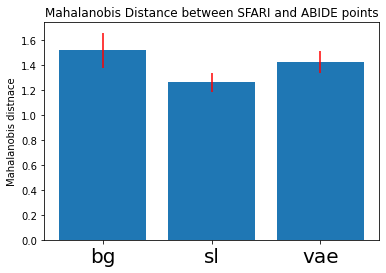

In [23]:
plt.bar(xs,ys);
plt.errorbar(xs,ys,se,fmt='r ');
plt.xticks(xs,labels=['bg','sl','vae'],fontsize=20);
plt.ylabel('Mahalanobis distnace')
plt.title('Mahalanobis Distance between SFARI and ABIDE points')

In [25]:
#dist(np.vstack((sfari[0,:],abide[0,:])),metric='mahalanobis')

Text(0, 0.5, 'BIC - lower is better')

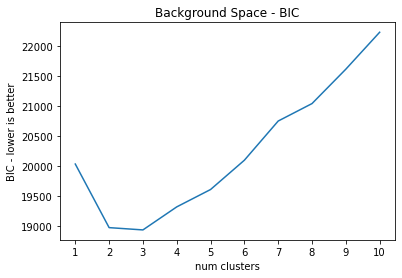

In [100]:
from sklearn.mixture import GaussianMixture as gmm
data_in = bg_abide
bic = list()
for i in range(10):
    g = gmm(n_components=i+1)
    g.fit(data_in)
    bic.append(g.bic(data_in))
    
plt.plot(np.arange(10),bic);
plt.xticks(np.arange(10),labels=np.arange(10)+1);
plt.title('Background Space - BIC')
plt.xlabel('num clusters')
plt.ylabel('BIC - lower is better')

Text(0, 0.5, 'BIC - lower is better')

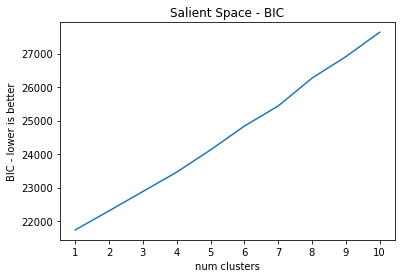

In [89]:
from sklearn.mixture import GaussianMixture as gmm
data_in = sl_abide
bic = list()
for i in range(10):
    g = gmm(n_components=i+1)
    g.fit(data_in)
    bic.append(g.bic(data_in))
    
plt.plot(np.arange(10),bic);
plt.xticks(np.arange(10),labels=np.arange(10)+1);
plt.title('Salient Space - BIC')
plt.xlabel('num clusters')
plt.ylabel('BIC - lower is better')

In [ ]:
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(10)])
plt.xticks(np.arange(10),labels=np.arange(10)+1);
arr = np.array([get_bic(bg_abide) for _ in range(100)])
xs = np.arange(10)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)

In [ ]:
get_bic = lambda data_in : np.array([gmm(n_components=i+1).fit(data_in).bic(data_in) for i in range(10)])
arr = np.array([get_bic(sl_abide) for _ in range(100)])
xs = np.arange(10)
plt.plot(xs,arr.mean(axis=0))
plt.fill_between(xs,arr.mean(axis=0),arr.min(axis=0),arr.max(axis=0),alpha=.3)